<a href="https://colab.research.google.com/github/Batman2002/boilerplate-demographic-data-analyzer-2/blob/main/boilerplate_medical_data_visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("medical_examination.csv",index_col="id")
df2=pd.read_csv("medical_examination.csv")
df3=pd.read_csv("medical_examination.csv",index_col="id")
df4=pd.read_csv("medical_examination.csv",index_col="id")
# df3.loc[df["cholesterol"]==1]=0
# df3.loc[df["cholesterol"]>1]=1
df["overweight"]=(df["weight"]/((df["height"]/100)**2))
df.loc[df["overweight"]<=25]=0
df.loc[df["overweight"]>25]=1
# df2["overweight"]=df["overweight"]
df2["cholesterol"]=0
df2["cholesterol"]=df3["cholesterol"]
# df_cat=df2.melt(id_vars=["id"],value_vars=["cholesterol","gluc","smoke","alco","active","overweight"])
# df_cat
df2

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1.0,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3.0,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3.0,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1.0,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,NaN,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,1.0,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,NaN,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1.0,2,0,0,0,1


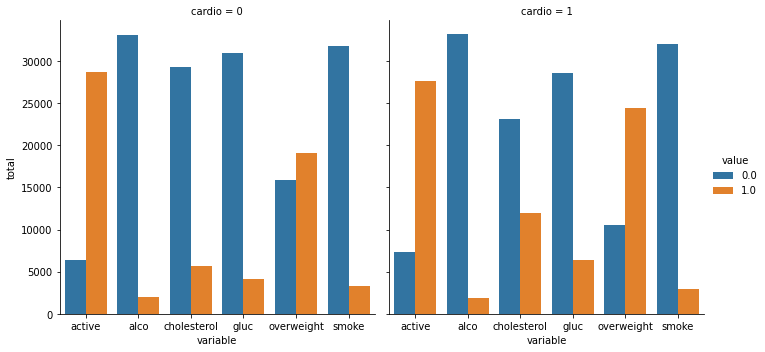

In [ ]:
df=pd.read_csv("medical_examination.csv")
df2=pd.read_csv("medical_examination.csv")
df3=pd.read_csv("medical_examination.csv")
df4=pd.read_csv("medical_examination.csv")
df3.loc[df3["cholesterol"]==1]=0
df3.loc[df3["cholesterol"]>1]=1
df4.loc[df4["gluc"]==1]=0
df4.loc[df4["gluc"]>1]=1
df["overweight"]=(df["weight"]/((df["height"]/100)**2))
df.loc[df["overweight"]<=25]=0
df.loc[df["overweight"]>25]=1
df2["overweight"]=df["overweight"]
df2["cholesterol"]=df3["cholesterol"]
df2["gluc"]=df4["gluc"]
df_cat=df2.melt(id_vars=["cardio"],value_vars=["cholesterol","gluc","smoke","alco","active","overweight"])
df_cat["total"]=df_cat["value"]
df_cat=df_cat.groupby(["cardio","variable","value"]).count()
dfcat=df_cat.copy()
dfcat=dfcat.reset_index()
dfcat.sort_values("total",ascending=False)
dfcat["value"]=dfcat["value"].astype(str)
dfcat["cardio"]=dfcat["cardio"].astype(str)
dfcat
g=sns.catplot(data=dfcat,x="variable",y="total",col="cardio",hue="value",kind="bar")

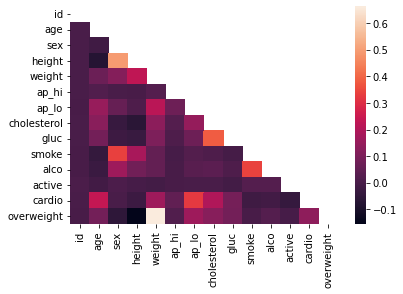

In [7]:
df=pd.read_csv("medical_examination.csv")
df2=pd.read_csv("medical_examination.csv")
df3=pd.read_csv("medical_examination.csv")
df4=pd.read_csv("medical_examination.csv")
df3.loc[df3["cholesterol"]==1]=0
df3.loc[df3["cholesterol"]>1]=1
df4.loc[df4["gluc"]==1]=0
df4.loc[df4["gluc"]>1]=1
df["overweight"]=(df["weight"]/((df["height"]/100)**2))
df.loc[df["overweight"]<=25]=0
df.loc[df["overweight"]>25]=1
df2["overweight"]=df["overweight"]
df2["cholesterol"]=df3["cholesterol"]
df2["gluc"]=df4["gluc"]
s=(df2['ap_lo'] >= df2['ap_hi'])
d=df2.loc[s]
df2.drop(d.index,inplace=True)
c=(df2['height'] <= df2['height'].quantile(0.025))
a=(df2['height'] >= df2['height'].quantile(0.975))
b=df2.loc[a]
d=df2.loc[c]
df2.drop(b.index,inplace=True)
df2.drop(d.index,inplace=True)
g=(df2['weight'] <= df2['weight'].quantile(0.025))
f=(df2['weight'] >= df2['weight'].quantile(0.975))
j=df2.loc[f]
k=df2.loc[g]
df2.drop(j.index,inplace=True)
df2.drop(k.index,inplace=True)
df2=df2.corr()
mask = np.triu(np.ones_like(df2))
sns.heatmap(df2,mask=mask)